In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
df_Numeric = pd.read_excel(r"mergeHome_Numeric.xlsx")
df_Numeric.drop("Unnamed: 0", axis = 1, inplace = True)

# Bagımlı Degisken -> Fiyat
# Bagımsız Degisken ayrımı -> Fiyaat dşındaki özellikler

X = df_Numeric.drop(["Fiyat"], axis = 1)
y = df_Numeric["Fiyat"]

Train and Test Data

In [3]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

GridSearchCV

In [4]:
# GridSearchCV -> Modelimizde en iyi parametrelerin ne oldugunu buluyor

#params = {"colsample_bytree":[0.4,0.5,0.6],
         #"learning_rate":[0.01,0.02,0.09],
         #"max_depth":[2,3,4,5,6],
         #"n_estimators":[100,200,500,2000]}

         
#xgb = XGBRegressor()
#grid = GridSearchCV(xgb, params, cv = 10, n_jobs = -1, verbose = 2)
#grid.fit(X_train, y_train)
#grid.best_params_

Model Traning

In [5]:
xgbr = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.02, max_depth = 6, n_estimators = 2000)
xgbr.fit(X_train, y_train)

[09:55:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, learning_rate=0.02, max_depth=6,
             n_estimators=2000)

Metrics

Training score:  0.893228466423388
MSE: 24330347.30
RMSE: 4932.58
R2:  0.7170652744832102
MAE:  3408.503613714636
MAPE:  3408.503613714636


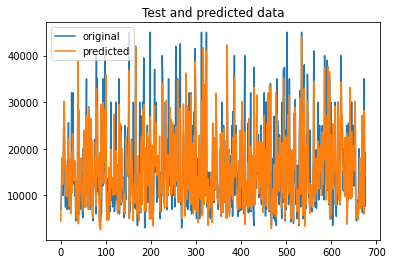

In [15]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: ", mae)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

One Home

In [13]:
new_data = [[2],[61],[50],[10],[15],[5],[0],[31]]


new_data = pd.DataFrame(new_data).T

df_new = new_data.rename(columns={
     0: "Oda_Sayisi",
     1: "Brut",
     2: "Net",
     3: "Bulundugu_Kat",
     4: "Bina_Yas",
     5: "Isitma_Tipi",
     6: "Esya_Durumu",
     7: "Ilce"})

pred = xgbr.predict(df_new)
pred

#7500

array([7880.1333], dtype=float32)